In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
store = pd.HDFStore('arthur_store.h5')
unigrams = store['prominence_n1'].sort_values(by='cooc', ascending=False)
bigrams = store['prominence_n2'].sort_values(by='cooc', ascending=False)
ngrams3 = store['prominence_n3'].sort_values(by='cooc', ascending=False)
ngrams4 = store['prominence_n4'].sort_values(by='cooc', ascending=False)

In [3]:
# count ngrams 
c = len(ngrams4.index)
print("Counts \n  unigrams: {c1}\n  bigrams: {c2}\n  trigrams: {c3}\n  4grams: {c4}".format(
    c1=len(unigrams.index), c2=len(bigrams.index), c3=len(ngrams3.index), c4=len(ngrams4.index)))

Counts 
  unigrams: 5372
  bigrams: 29148
  trigrams: 49088
  4grams: 54965


In [26]:
unigrams.head(10)

,word1,cooc
30,THE,1.000000
8,",",1.000000
57,AND,1.000000
25,.,1.000000
51,A,0.999993
34,;,0.999990
37,TO,0.999984
16,OF,0.999982
66,“,0.999971
69,”,0.999963


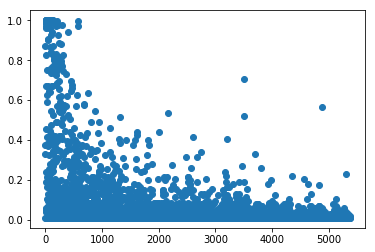

In [73]:
df = store['prominence_n1']
plt.plot(unigrams['cooc'], 'o')

Pick a few "interesting" unigrams. Interesting means frequent but not too frequent.

In [5]:
unigrams[20:40]

,word1,cooc
94,THEY,0.993091
72,SAID,0.992205
185,WITH,0.986038
27,NOT,0.985170
13,SO,0.984406
21,HIS,0.984089
44,FOR,0.982229
58,AS,0.982229
50,HAD,0.981124
184,ON,0.978705


In [6]:
w1 = unigrams.loc[189, 'word1'] # LITTLE
w1

'LITTLE'

Pick a few interesting bigrams containing w1.

In [7]:
bigrams[(bigrams.word1==w1)].head(5)

,word1,word2,cooc
13784,LITTLE,BOY,0.370176
14351,LITTLE,GERDA,0.317445
13786,LITTLE,GIRL,0.229957
14070,LITTLE,KAY,0.222179
17802,LITTLE,MAIDEN,0.165486


In [8]:
bigrams[(bigrams.word2==w1)].head()

,word1,word2,cooc
6048,THE,LITTLE,0.734634
1495,A,LITTLE,0.452843
1700,HER,LITTLE,0.131254
10514,POOR,LITTLE,0.086483
12534,AND,LITTLE,0.067935


Conclusion: "little" is more interesting as a prefix of a bigram.

In [9]:
w2 = bigrams[(bigrams.word1==w1)].loc[13784, 'word2'] #BOY
w2

'BOY'

Now with trigrams

In [10]:
ngrams3[(ngrams3.word2==w1) & (ngrams3.word3 ==w2)].head()

,word1,word2,word3,cooc
19994,THE,LITTLE,BOY,0.317445
19698,A,LITTLE,BOY,0.067935
31120,FIRST,LITTLE,BOY,0.010000


In [11]:
ngrams3[(ngrams3.word1==w1) & (ngrams3.word2 ==w2)].head()

,word1,word2,word3,cooc
20164,LITTLE,BOY,.,0.104662
20397,LITTLE,BOY,",",0.058520
35684,LITTLE,BOY,!,0.029701
20299,LITTLE,BOY,WAS,0.019900
35674,LITTLE,BOY,WENT,0.019900


Conclusion: "little boy" is more interesting as the suffix of a trigram than as a prefix

In [12]:
ngrams4[(ngrams4.word1==w1) & (ngrams4.word2 ==w2)].head()

,word1,word2,word3,word4,cooc
21249,LITTLE,BOY,",",WHO,0.029701
40073,LITTLE,BOY,!,”,0.019900
35186,LITTLE,BOY,LAY,IN,0.010000
36567,LITTLE,BOY,STOOD,BEFORE,0.010000
39860,LITTLE,BOY,HAD,GROWN,0.010000


In [13]:
ngrams4[(ngrams4.word2==w1) & (ngrams4.word3 ==w2)].head()

,word1,word2,word3,word4,cooc
20985,THE,LITTLE,BOY,.,0.104662
21248,THE,LITTLE,BOY,",",0.039404
38905,THE,LITTLE,BOY,WENT,0.019900
21131,THE,LITTLE,BOY,WAS,0.019900
40072,A,LITTLE,BOY,!,0.019900


In [14]:
ngrams4[(ngrams4.word3==w1) & (ngrams4.word4 ==w2)].head()

,word1,word2,word3,word4,cooc
20984,SAID,THE,LITTLE,BOY,0.077255
32743,AND,THE,LITTLE,BOY,0.058520
20869,ASKED,THE,LITTLE,BOY,0.049010
38352,AT,THE,LITTLE,BOY,0.019900
22020,THAT,THE,LITTLE,BOY,0.019900


In [15]:
def chain4(ngrams4, w1, w2, w3):
    return ngrams4[(ngrams4.word1==w1) & (ngrams4.word2 ==w2) & (ngrams4.word3 ==w3)].head()

In [16]:
chain4(ngrams4, 'BOY', ',', 'WHO')

,word1,word2,word3,word4,cooc
10470,BOY,",",WHO,WAS,0.0199
36754,BOY,",",WHO,WENT,0.0100
35987,BOY,",",WHO,HAD,0.0100
38413,BOY,",",WHO,DIRECTLY,0.0100
12794,BOY,",",WHO,DID,0.0100


In [17]:
chain4(ngrams4, ',', 'WHO', 'WAS')

,word1,word2,word3,word4,cooc
9244,",",WHO,WAS,NOW,0.039404
26164,",",WHO,WAS,SITTING,0.019900
29204,",",WHO,WAS,DRESSING,0.010000
33745,",",WHO,WAS,LISTENING,0.010000
50209,",",WHO,WAS,MUCH,0.010000


In [18]:
chain4(ngrams4, 'WHO', 'WAS', 'NOW')

,word1,word2,word3,word4,cooc
49888,WHO,WAS,NOW,NO,0.01
47809,WHO,WAS,NOW,THE,0.01
9245,WHO,WAS,NOW,RETURNING,0.01
27385,WHO,WAS,NOW,MARRIED,0.01
14479,WHO,WAS,NOW,A,0.01


In [19]:
chain4(ngrams4, 'WAS', 'NOW', 'RETURNING')

,word1,word2,word3,word4,cooc
9246,WAS,NOW,RETURNING,HOME,0.01


In [20]:
chain4(ngrams4, 'NOW', 'RETURNING', 'HOME')

,word1,word2,word3,word4,cooc
9247,NOW,RETURNING,HOME,FROM,0.01


In [21]:
chain4(ngrams4, 'RETURNING', 'HOME', 'FROM')

,word1,word2,word3,word4,cooc
9248,RETURNING,HOME,FROM,A,0.01


In [22]:
chain4(ngrams4, 'HOME', 'FROM', 'A')

,word1,word2,word3,word4,cooc
9249,HOME,FROM,A,NOISY,0.01


In [23]:
chain4(ngrams4, 'FROM', 'A', 'NOISY')

,word1,word2,word3,word4,cooc
9250,FROM,A,NOISY,DRINKING,0.01


In [24]:
chain4(ngrams4, 'A', 'NOISY', 'DRINKING')

,word1,word2,word3,word4,cooc
9251,A,NOISY,DRINKING,BOUT,0.01


In [25]:
chain4(ngrams4, 'NOISY', 'DRINKING', 'BOUT')

,word1,word2,word3,word4,cooc
9252,NOISY,DRINKING,BOUT,",",0.01
